In [ ]:
  import pandas as pd

pd.__version__


'1.1.5'

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

import plotly.graph_objs as go

from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
import plotly.express as px

In [ ]:
df = pd.read_csv("/content/train.csv")
df.head()

In [ ]:
df.tail()

In [ ]:
fig = px.bar(df, x = 'YrSold', y = 'SalePrice',title='Graph',width=500,height=500) 
fig.show()

In [ ]:

from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

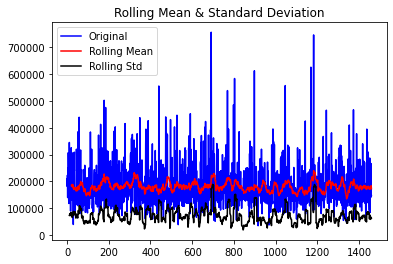

ADF Stastistic: -38.223698
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.435 
	5%: -2.864 
	10%: -2.568 


In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plt.plot(x, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
ts = df['SalePrice']      
test_stationarity(ts)


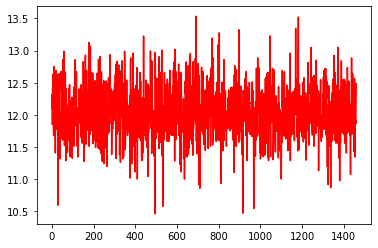

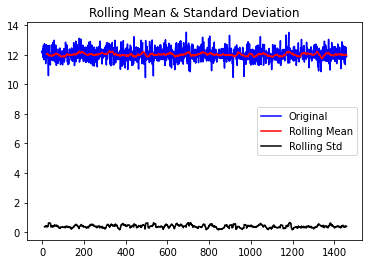

ADF Stastistic: -37.642200
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.435 
	5%: -2.864 
	10%: -2.568 


In [ ]:
ts_log = np.log(ts)
plt.plot(ts_log,color="red")
plt.show()

test_stationarity(ts_log)

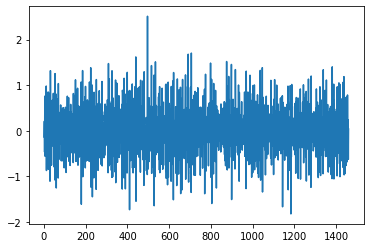

In [ ]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()

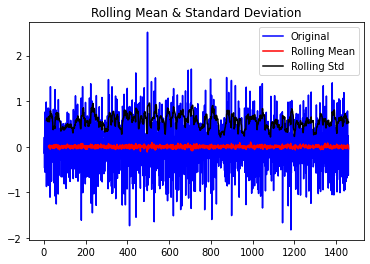

ADF Stastistic: -14.458065
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.435 
	5%: -2.864 
	10%: -2.568 


In [ ]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

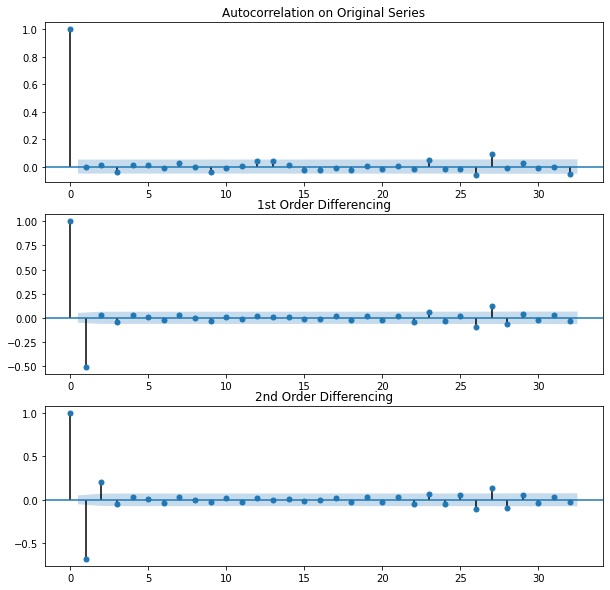

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(311)
fig = plot_acf(ts,ax=ax1,title="Autocorrelation on Original Series") 
ax2 = fig.add_subplot(312)
fig = plot_acf(ts.diff().dropna(), ax=ax2, title="1st Order Differencing")
ax3 = fig.add_subplot(313)
fig = plot_acf(ts.diff().diff().dropna(), ax=ax3, title="2nd Order Differencing")



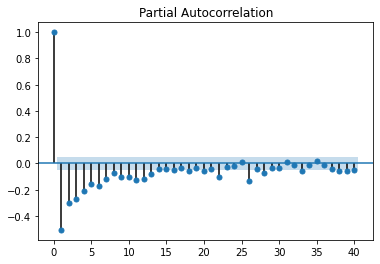

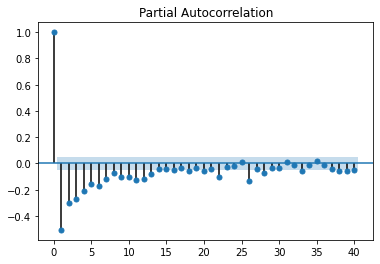

In [ ]:
plot_pacf(ts.diff().dropna(), lags=40)


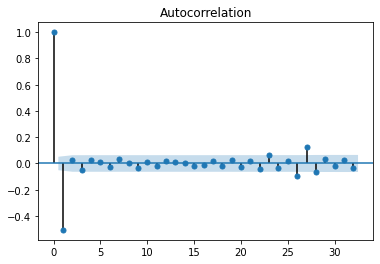

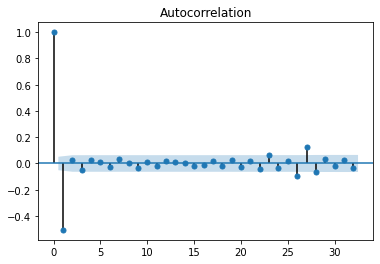

In [ ]:
plot_acf(ts.diff().dropna())


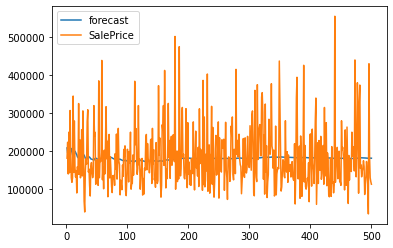

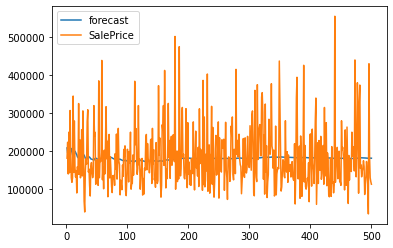

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts, order=(0, 1, 1))
results = model.fit()
results.plot_predict(1, 500)


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.SalePrice   No. Observations:                 1459
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -18535.113
Method:                       css-mle   S.D. of innovations          79424.275
Date:                Tue, 30 Jun 2020   AIC                          37076.226
Time:                        10:59:41   BIC                          37092.082
Sample:                             1   HQIC                         37082.141
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.1263      4.932     -0.837      0.403     -13.793       5.540
ma.L1.D.SalePrice    -1.0000      0.002   -522.102      0.000      -1.004      -0.996
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
series = read_csv('/content/train.csv')
X = series.SalePrice
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]


In [ ]:
print("Train")
print(train)


Train
0      208500
1      181500
2      223500
3      140000
4      250000
        ...  
958    185000
959    155000
960    116500
961    272000
962    155000
Name: SalePrice, Length: 963, dtype: int64


In [ ]:
print("Test")
print(test)

Test
963     239000
964     214900
965     178900
966     160000
967     135000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 497, dtype: int64


In [ ]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()[0]
	yhat = output[0]
	predictions.append(yhat)
	obs = t
	history.append(obs)
	print('predicted=%f' % yhat)

	
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


predicted=181449.323780
predicted=180850.486639
predicted=180097.174980
predicted=179351.226990
predicted=178623.910726
predicted=177857.155089
predicted=177116.515545
predicted=176376.748628
predicted=164584.817559
predicted=157029.218060
predicted=149311.195533
predicted=140259.799753
predicted=129219.174890
predicted=116465.781749
predicted=103945.530757
predicted=92773.099032
predicted=83226.066632
predicted=74820.718762
predicted=67722.252871
predicted=61318.934986
predicted=55713.917396
predicted=50663.503657
predicted=46265.489225
predicted=42205.868543
predicted=38662.145513
predicted=35359.655473
predicted=32441.918710
predicted=29760.680419
predicted=27377.601315
predicted=25102.692949
predicted=23088.062569
predicted=21167.648041
predicted=19347.073885
predicted=17882.644610
predicted=16451.888642
predicted=15116.019965
predicted=13905.634614
predicted=12739.967718
predicted=11719.933095
predicted=10728.955984
predicted=9806.470642
predicted=8947.317573
predicted=8234.222777